In [16]:
import warnings; warnings.filterwarnings("ignore")
import os;
from sys import platform
print(os.getcwd())
if platform == "darwin":
    os.chdir('/Users/ziyingc/Dropbox/Lab/MotorCortex')
elif platform == "win32":
    os.chdir('D:\Dropbox\Lab\MotorCortex')
print(os.getcwd())
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm # colormap module
import matplotlib.mlab as mlab 
from matplotlib.gridspec import GridSpec
import numpy as np
import nelpy as nel
import philters
fs_out = 1000;fps = 30
rfdn = 'Rats/Rat_Outlaw/';subset = np.array([5,13])
epn = np.load(rfdn+'epn.npy');

print(epn[0][10:21], 'to',epn[-1][10:21], ',',len(epn))

fl = np.arange(2,8)*5
fh = np.arange(3,9)*5
l_f = len(fl)
N = int((1/50)/(1/fs_out))
window = np.hanning(N*2+1);
txt_line = ['r-', 'b-']
print(len(window),len(fl), len(fh))

D:\Dropbox\Lab\MotorCortex
D:\Dropbox\Lab\MotorCortex
190527_1220 to 190627_1630 , 52
41 6 6


In [33]:
for k in epn:
    fdn = rfdn+k+'/'
    ts        = np.load(fdn+'NPY_'+str(fs_out)+'/ts_ds.npy')
    idx_clean = np.load(fdn + 'NPY_'+str(fs_out)+'/idx_clean.npy')
    X_f = np.zeros([l_f,len(ts)])
    
    for i in subset:
        chn = str(i//10)+str(i%10)
#         x = np.load(fdn+'NPY_'+str(fs_out)+'/ch.'+chn+'.npy')
#         sig = nel.AnalogSignalArray(data=x, timestamps=ts, fs=fs_out)
#         for i_f in np.arange(l_f):
            
#             lfp_f = nel.filtering.sosfiltfilt(sig, fl=fl[i_f], fh=fh[i_f])

#             x_f = lfp_f.ydata[0]
#             x_f = (x_f-np.mean(x_f[idx_clean]))/np.std(x_f[idx_clean])

#             spk_Sxx_ft_l_m = np.convolve(x_f**(2), window, mode='same')
#             X_f[i_f, :] = spk_Sxx_ft_l_m
#         np.save(fdn+'NPY_'+str(fs_out)+'/ch.'+chn+ 'filtered' +'.npy', X_f)
        try:
            os.remove(fdn+'NPY_'+str(fs_out)+'/ch.'+chn+ 'filtered' +'.npy')
            os.remove(fdn+'NPY_'+str(fs_out)+'/ch.'+chn+'.P_ft_spk.npy')
        except:
            print(k,':nothing was removed')
    try:
        os.remove(fdn + 'NPY_'+str(fs_out)+'/common_spk_fps.npy')
    except:
        print(k,':nothing was removed')
            

In [27]:
for k in epn:
    fdn = rfdn+k+'/'
    ts        = np.load(fdn + 'NPY_'+str(fs_out)+'/ts_ds.npy')
    idx_clean = np.load(fdn + 'NPY_'+str(fs_out)+'/idx_clean.npy')
    ii = 0
    print(k)
    for i in subset:
        chn    = str(i//10)+str(i%10)
        fn     = 'NPY_'+str(fs_out)+'/ch.'+chn+'.npy'
        X_f = np.load(fdn+'NPY_'+str(fs_out)+'/ch.'+chn+ 'filtered' +'.npy')
        
        Sx_t_8hz_m   = np.mean(X_f[0,:]);
        Sx_t_8hz_md  = np.median(X_f[0,:]);
#         Sx_t_8hz_std = np.std(X_f[0,:]);

        spk_Sxx_ft = np.zeros(X_f.shape)
        spk_Sxx_ft_T = np.zeros(X_f.shape)
        for j in np.arange(l_f):
            
#             Sx_t_8hz_md  = np.median(X_f[j,:]);
            index, T = philters.read_burst(X_f[j,:], Sx_t_8hz_md*1.0, Sx_t_8hz_md*2.0)
            index_end = index+T
            index_clean = idx_clean[index];
            index_clean_end = idx_clean[index_end];
            T           = T[np.logical_and(index_clean, index_clean_end)]
            index       = index[np.logical_and(index_clean, index_clean_end)]
            spk_Sxx_ft[j, index] = T
        np.save(fdn + 'NPY_'+str(fs_out)+'/ch.'+chn+'.P_ft_spk.npy', spk_Sxx_ft)
        ii = ii+1


myAnimal20190527_122048
myAnimal20190527_124832
myAnimal20190527_125226
myAnimal20190528_125224
myAnimal20190528_130312
myAnimal20190528_131113
myAnimal20190529_134642
myAnimal20190529_135946
myAnimal20190529_140941
myAnimal20190530_102143
myAnimal20190530_103155
myAnimal20190530_104202
myAnimal20190531_140205
myAnimal20190531_140711
myAnimal20190601_131527
myAnimal20190601_132040
myAnimal20190603_103350
myAnimal20190603_104015
myAnimal20190603_105314
myAnimal20190604_121502
myAnimal20190604_122638
myAnimal20190604_123335
myAnimal20190604_124200
myAnimal20190605_121018
myAnimal20190605_121537
myAnimal20190605_122924
myAnimal20190605_153845
myAnimal20190605_155108
myAnimal20190607_153725
myAnimal20190610_095549
myAnimal20190610_104038
myAnimal20190610_113733
myAnimal20190610_114054
myAnimal20190610_151753
myAnimal20190611_112619
myAnimal20190611_114036
myAnimal20190612_111857
myAnimal20190613_130247
myAnimal20190613_130717
myAnimal20190613_131241
myAnimal20190617_114633
myAnimal20190618

In [30]:
N = 50
for k in epn:
    fdn = rfdn + k + '/'
    timestamps = np.load(fdn + 'NPY_'+str(fs_out)+'/ts_ds.npy');l_t = len(timestamps)
    idx_clean = np.load(fdn + 'NPY_'+str(fs_out)+'/idx_clean.npy')
    common_spk = np.zeros([l_f,l_t])>-100
    spk_Sxx_ft_l = np.zeros([l_f,l_t])
    spk_Sxx_ft_i = np.zeros([l_f,l_t])
    
    i = subset[0]; chn = str(i//10)+str(i%10);
    spk_Sxx_ft = np.load(fdn + 'NPY_'+str(fs_out)+'/ch.'+chn+'.P_ft_spk.npy').astype('float')
    spk_Sxx_ft_l[spk_Sxx_ft>0] = 1
    
    i = subset[1]; chn = str(i//10)+str(i%10);
    spk_Sxx_ft = np.load(fdn + 'NPY_'+str(fs_out)+'/ch.'+chn+'.P_ft_spk.npy').astype('float')
    spk_Sxx_ft_i[spk_Sxx_ft>0] = 1
    
    for i in np.arange(l_f):
        spk_Sxx_ft_l_m = np.convolve(spk_Sxx_ft_l[i, :], np.ones((N,))/N, mode='same')
        spk_Sxx_ft_i_m = np.convolve(spk_Sxx_ft_i[i, :], np.ones((N,))/N, mode='same')
        common_spk[i,:] = np.logical_and(spk_Sxx_ft_l_m > 0, spk_Sxx_ft_i_m > 0)
    np.save(fdn + 'NPY_'+str(fs_out)+'/common_spk_fps.npy', common_spk)

16


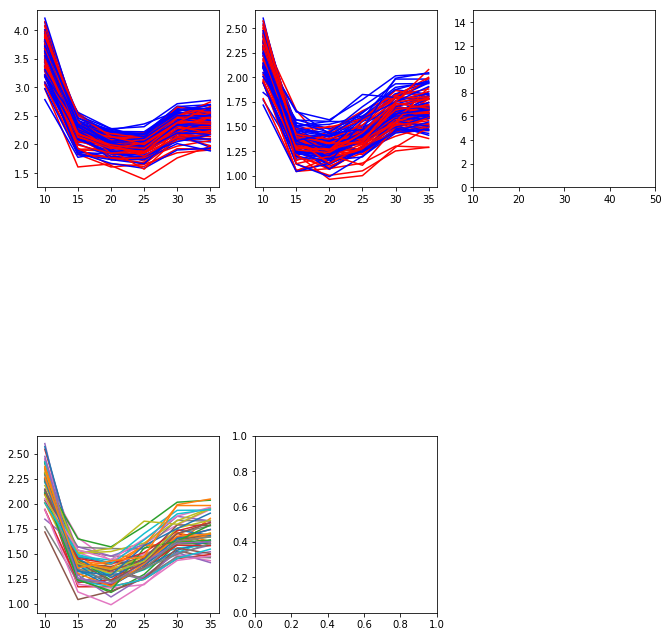

In [31]:
fig = plt.figure(1, figsize=(15,15))
gs = GridSpec(4, 4);
N = int((1/fps)/(1/fs_out)/2); print(N)
T = 20;

l_k = len(epn)

epn_x = []
for k in epn:
    fdn = rfdn + k + '/'
    timestamps = np.load(fdn + 'NPY_'+str(fs_out)+'/ts_ds.npy');l_t = len(timestamps)/fs_out
    idx_clean = np.load(fdn + 'NPY_'+str(fs_out)+'/idx_clean.npy')
    common_spk = np.load(fdn + 'NPY_'+str(fs_out)+'/common_spk_fps.npy')

    ii = 0
    n_spk_f_2 = np.empty([2,l_f])
    for i in subset:
        chn    = str(i//10)+str(i%10)
        spk_Sxx_ft_T = np.load(fdn + 'NPY_'+str(fs_out)+'/ch.'+chn+'.P_ft_spk.npy')
        
        spk_Sxx_ft   = spk_Sxx_ft_T>0
        n_spk_f = np.sum(spk_Sxx_ft, axis=1)
        T_spk_f = np.divide(np.sum(spk_Sxx_ft_T, axis=1),n_spk_f)
        
        ax_idx = gs[0,0];ax = fig.add_subplot(ax_idx);
        ax.plot(fl, n_spk_f/l_t, txt_line[ii]);#ax.set_ylim([0,5.5])
        spk_Sxx_ft_unique = spk_Sxx_ft
        spk_Sxx_ft_unique[common_spk] = 0
        
        n_spk_f = np.sum(spk_Sxx_ft_unique, axis=1)
        n_spk_f_2[ii,:] = n_spk_f
        ax_idx = gs[0,1];ax = fig.add_subplot(ax_idx);
        ax.plot(fl, n_spk_f/l_t, txt_line[ii]);#ax.set_ylim([0,5.5])
        
        
        ax_idx = gs[0,2];ax = fig.add_subplot(ax_idx);
        spk_Sxx_ft_unique_T = spk_Sxx_ft_T
        spk_Sxx_ft_unique_T[common_spk] = 0
        T_spk_f = np.divide(np.sum(spk_Sxx_ft_T, axis=1), n_spk_f)
        ax.plot(fl, T_spk_f, txt_line[ii]);
        ax.set_ylim([0,15]);ax.set_xlim([10,50])
        
        ii = ii+1
    spk_Sxx_ft_common = spk_Sxx_ft-spk_Sxx_ft_unique
    n_spk_f = np.sum(spk_Sxx_ft_unique, axis=1)
    ax_idx = gs[2,0];ax = fig.add_subplot(ax_idx);
    ax.plot(fl, n_spk_f/l_t);#ax.set_ylim([0,1.5])
    ax_idx = gs[2,1];ax = fig.add_subplot(ax_idx);

(153,)


(917.44, 977.4401103435681)

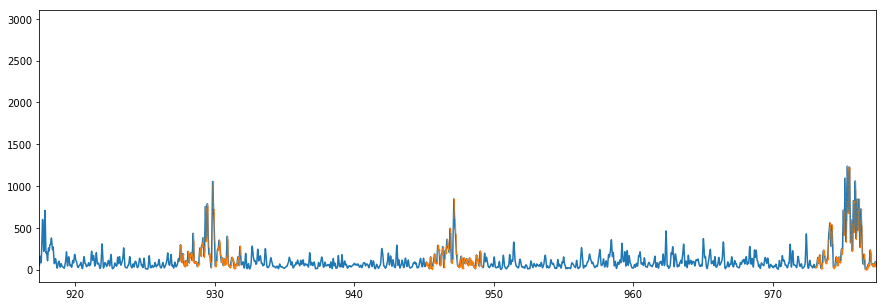

In [23]:
fig = plt.figure(1, figsize=(15, 5))
gs = GridSpec(1 , 1);
T = 60
print(window.shape)
ax_idx = gs[0];ax = fig.add_subplot(ax_idx);
ax.plot(ts[0:fs_out*T], spk_Sxx_ft_l_m[0:fs_out*T]);
# ax.plot(ts[np.logical_not(idx_clean)], spk_Sxx_ft_l_m[np.logical_not(idx_clean)],'.',ms=0.2);
ax.set_xlim(ts[[0,fs_out*T]])